In [1]:
import numpy as np
import matplotlib.pyplot as plt
from plasmapy.dispersion import plasma_dispersion_func as pdf
from scipy import constants as cn
import cmath

In [2]:
# energy is in kilo-electron volts
def energ_to_freq(E):
    # E = hf => f = E/h
    freq_hz = (E*1000*cn.e)/cn.h
    return freq_hz

In [3]:
E_i = np.array([0.02,0.2,2,10,20,40,200])

In [4]:
# classical electron radius
r_e =  (1/(4*cn.pi*cn.epsilon_0))*(cn.e**2/(cn.m_e*cn.c**2))
# choose initial energy and frequency
#E_i = 40 # kev
w_i = 2*cn.pi*energ_to_freq(E_i) # initial frequency
w_c = 2*cn.pi*energ_to_freq(20)  # cyclotron frequency at 20 keV
gamma_r = (2*cn.e**2*w_i**2)/(2*cn.m_e*cn.c**3)
n_e = 5*10**27 # in m^-3
B = 4.141*10**12
B_c = 4.141*10**13
w_p = np.sqrt((4*cn.pi*cn.e**2*n_e)/cn.m_e)# the plasma frequency

In [5]:
print(B/B_c)

0.1


In [6]:
def ellipticity(theta,w_c,w_p,w_i):
    u = w_c/w_i
    v = w_p/w_i
    delta = (cn.e**2/(cn.hbar*cn.c))**2*(45*cn.pi)**(-1)*(B/B_c)**2
    b = u**(1/2)*(np.sin(theta))**2*(2*np.cos(theta)*(1-v))**(-1)*(1 + delta*3*(u*v)*(-1)*(1-u))
    alpha = -b**(-1)*(1 + (1 + b**(-2))**(1/2))**(-1)
    return alpha

In [7]:
angles = np.linspace(0.1,90,100)

Text(0, 0.5, '$\\alpha(\\vartheta)$')

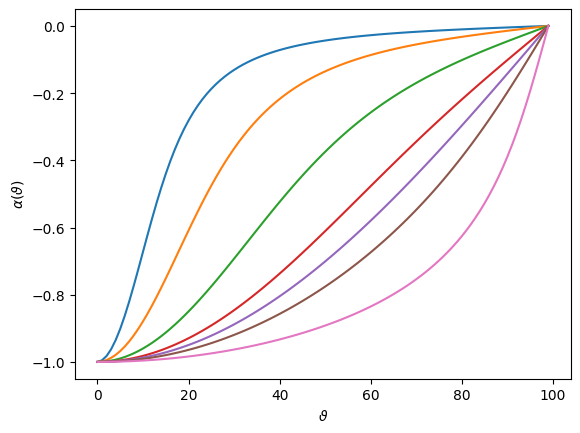

In [8]:
for freq in w_i:
    ellip = ellipticity(angles*np.pi/180,w_c,w_p,freq)
    plt.plot(ellip)
plt.xlabel(r'$\vartheta$')
plt.ylabel(r'$\alpha(\vartheta)$')

In [21]:
n_e = np.array([5e12,5e17,5e22,5e27,5e35,5e45,5e47]) # number density in m^-3
w_p = np.sqrt((4*cn.pi*cn.e**2*n_e)/cn.m_e)# the plasma frequency
E_i = 10

In [22]:
w_i = 2*cn.pi*energ_to_freq(E_i) # initial frequency

Text(0, 0.5, '$\\alpha(\\vartheta)$')

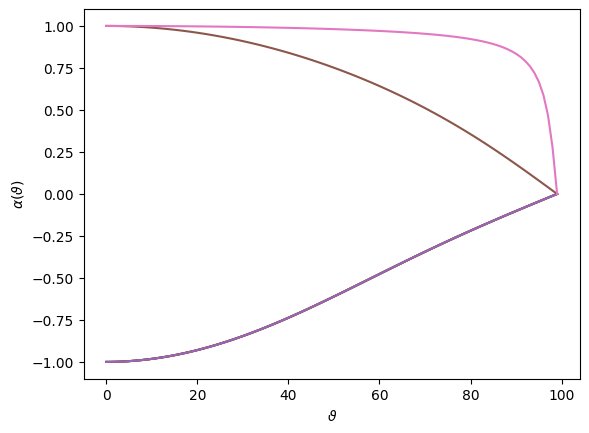

In [24]:
for freq in w_p:
    ellip = ellipticity(angles*np.pi/180,w_c,freq,w_i)
    plt.plot(ellip)
plt.xlabel(r'$\vartheta$')
plt.ylabel(r'$\alpha(\vartheta)$')